# Assignment 3

Lets import required libraries

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Writing the Functions as we use the same piece of code 

In [3]:
def reading(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    x = []
    y = []
    for line in lines:
        values = line.split(' ')
        x.append(float(values[0]))
        y.append(float(values[1]))
    x = np.array(x)
    y = np.array(y)
    plt.plot(x, y)
    plt.show()
    return x,y

This is the function to read the dataset and plot the values in the dataset.<br>
To do that it appends all x values to x and y values to y.<br>

In [14]:
def plot_error(y_exp):
    plt.plot(x, y)
    plt.errorbar(x[::5], y[::5], np.std(y-y_exp), fmt='ro')
    plt.show()

This is a function to plot the error bars with difference in values of expected curve and given values in the dataset.<br>

# Dataset 1 - Straight line

We need to compare the process of plotting the straight line by using lstsq and curve_fit

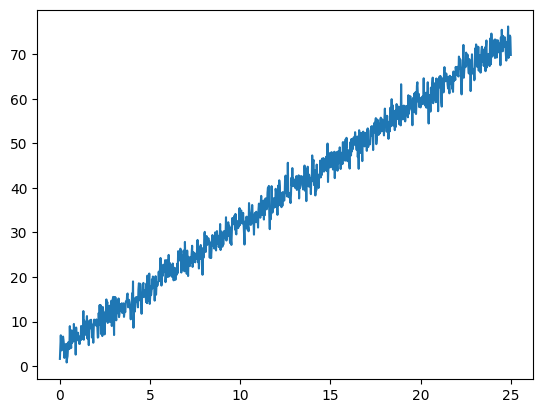

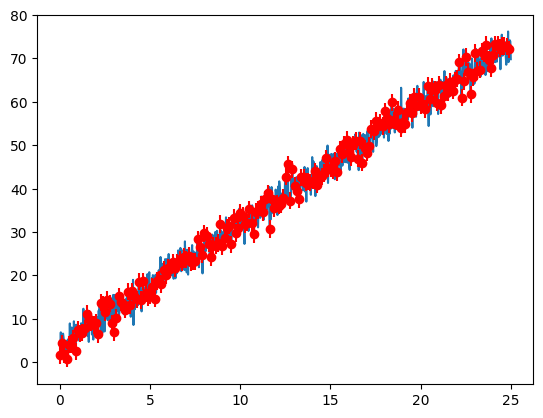

The estimated equation is 2.791124245414918 x + 3.848800101430742


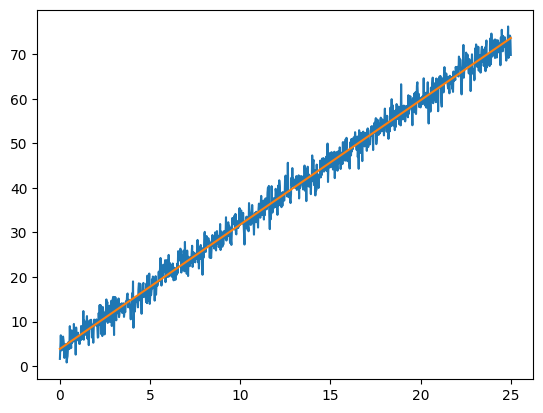

Time taken: 0.285947 seconds


In [15]:
start_time=time.time()
x,y=reading('dataset1.txt')
M = np.column_stack([x, np.ones(len(x))])
(p1, p2), _, _, _ = np.linalg.lstsq(M, y , rcond=None)
y_exp = p1*x+p2
plot_error(y_exp)
print(f"The estimated equation is {p1} x + {p2}")
plt.plot(x, y)
plt.plot(x, y_exp)
plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.6f} seconds")

I used time library to calculate the time taken in this process.<br>
And I tried to draw a expected curve by using lstsq and draw a straight line.<br>
Also plotted error bars

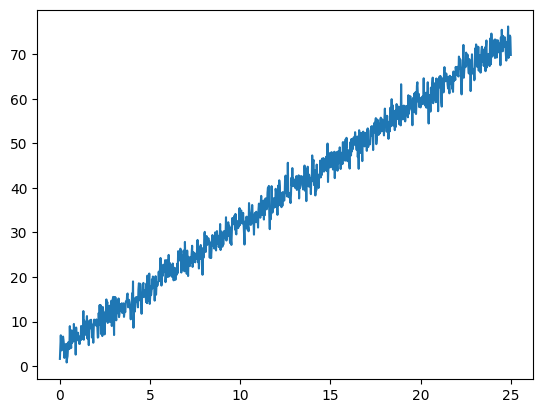

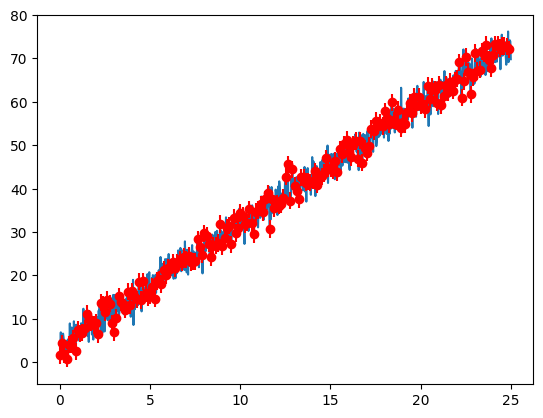

The estimated equation is 2.791124245414918 x + 3.848800101430742


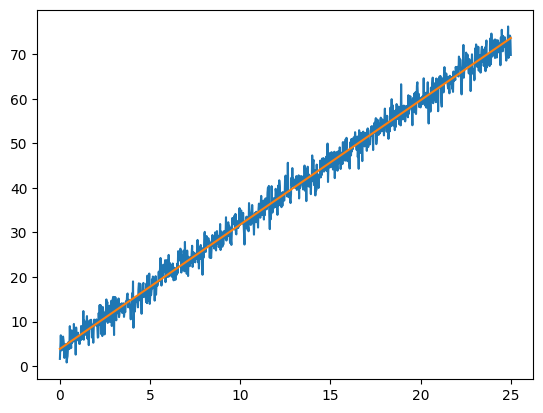

Time taken: 0.421093 seconds


In [16]:
start_time=time.time()
x,y=reading('dataset1.txt')
def linear_fit(x, m, b):
    return m * x + b
params, cov = curve_fit(linear_fit, x, y)
m, b = params
y_exp = linear_fit(x, m, b)
plot_error(y_exp)
print(f"The estimated equation is {p1} x + {p2}")
plt.plot(x, y)
plt.plot(x, y_exp)
plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.6f} seconds")

In the above code I used curve_fit to expect the curve and obtain the slope and intercept.<br>
After that i used those two values to draw a straight line.

After observing two methods i can say that curve_fit is used to plot complex functions and lstsq is used to to just plot linear equations.<br>
curve fit is providing us with answer in less time.<br>
So,it is effecient way as it uses complex algorithm.

# Dataset 2- Forier series

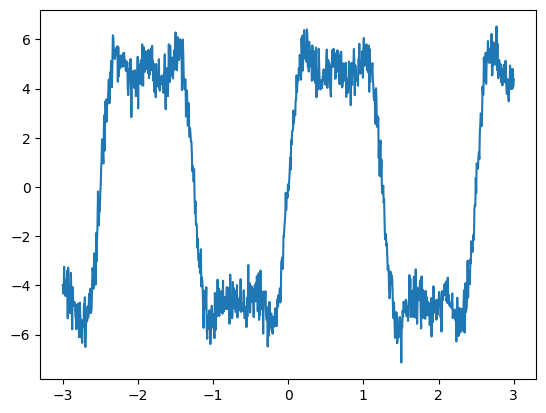

6.011120026320849 2.0014586398086704 0.9809069561926357 0.3999141220678749


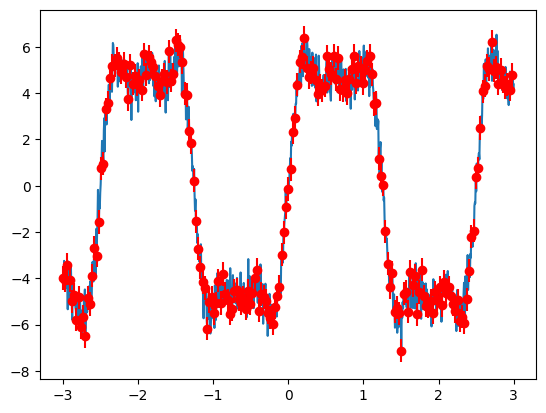

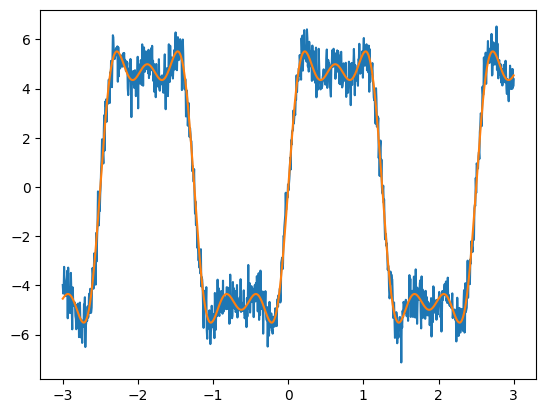

In [17]:
x,y=reading('dataset2.txt')
def forier(x,a1,a2,a3,p1):
    return a1*np.sin(2*np.pi*p1*x)+a2*np.sin(2*np.pi*3*p1*x)+a3*np.sin(2*np.pi*5*p1*x)
(a1,a2,a3,p1),cov = curve_fit(forier,x,y,p0=(1,1,1,0.3))
print(a1,a2,a3,p1)
y_exp=forier(x,a1,a2,a3,p1)
plot_error(y_exp)
plt.plot(x, y)
plt.plot(x, y_exp)
plt.show()

I have written forier function,as sum of three sine waves.a1,a2,a3 are amplitudes<br>
curve_fit provides optimized values for the forier co effs using p0 argument (1,1,1,0.3)


# Dataset 3 - Black Body Radiation

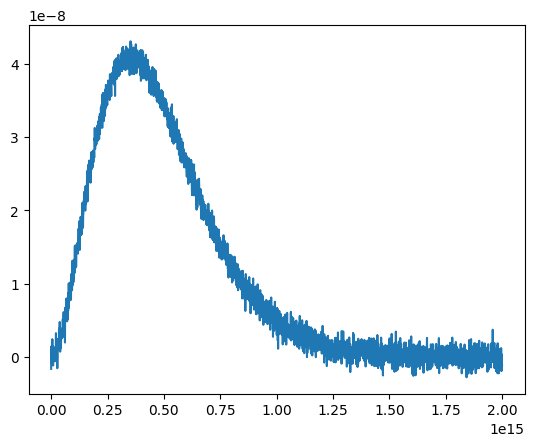

[6011.361521830407, 6.64322975913331e-34]


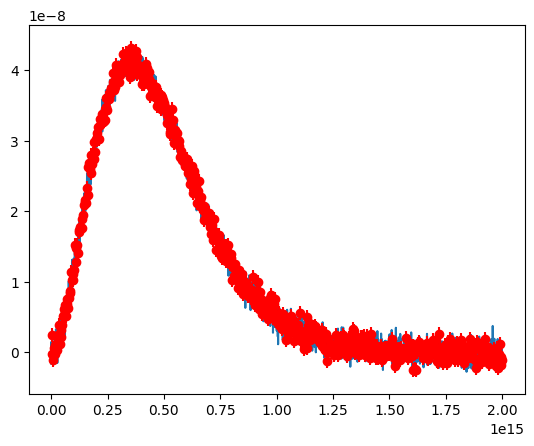

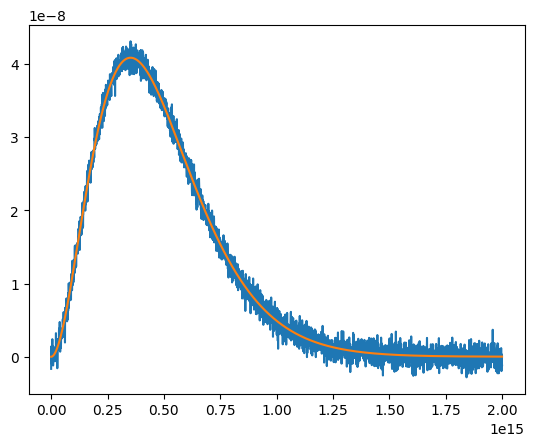

In [18]:
x,y=reading('dataset3.txt')
def plank_eqn(n,T,h):
    k=1.38e-23
    c=3.0e8
    return (2*h*n**3)/(c**2*(np.exp((h*n)/(k*T))-1))
(T,h),cov=curve_fit(plank_eqn,x,y,p0=[300,6.626015e-34])
print([T,h])
y_exp = plank_eqn(x,T,h)
plot_error(y_exp)
plt.plot(x, y)
plt.plot(x, y_exp)
plt.show()

It is plank distribution equation freq n , temperature T ,Plank constant h.The initial guess for the parameters is provided using the p0 argument, which is set to 300, 6.626015e-34<br>
curve_fit function returns the optimized values of the temperature T and the Planck constant h

# Dataset 4 - Unknown

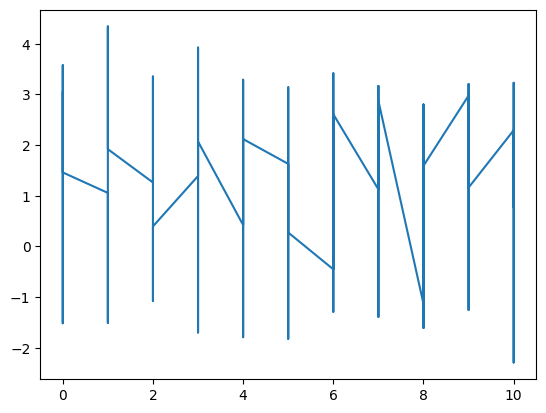

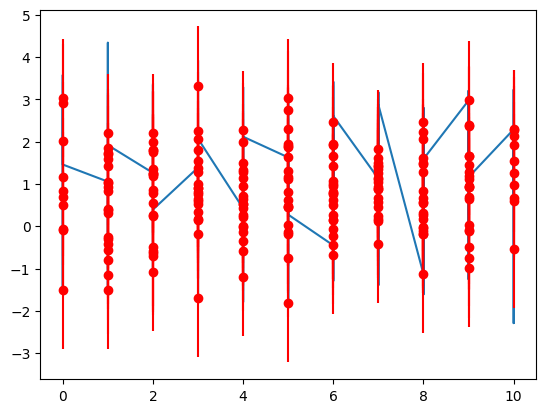

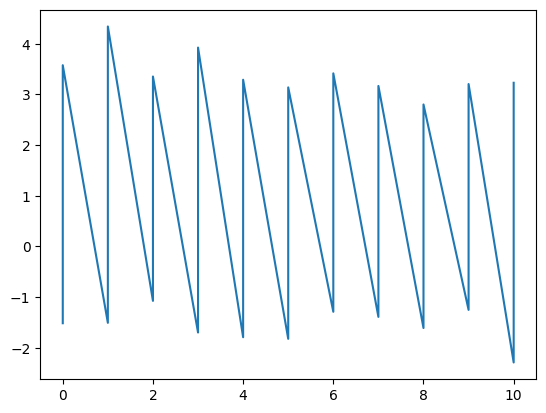

In [19]:
x,y=reading('dataset4.txt')
x, y_exp = (list(t) for t in zip(*sorted(zip(x, y))))
plot_error(y_exp)
plt.plot(x, y_exp)
plt.show()

The given code sorts the x and y lists based on the values of x in ascending order using the built-in zip and sorted functions. The resulting sorted x and y lists can then be used to plot the graphs.